## Single Hidden Layer Neural Network XOR Logic Code from Scratch

#### First I import numpy library and matplotlib used to display loss curve 

In [1]:
import numpy as np
import matplotlib.pyplot as plt



#### Then I defined the inputs and structure of neural network

In [2]:
# These are XOR inputs
x=np.array([[0,0,1,1],[0,1,0,1]])
# These are XOR outputs
y=np.array([[0,1,1,0]])
# Number of inputs
n_x = 2
# Number of neurons in output layer
n_y = 1
# Number of neurons in hidden layer
n_h = 2
# Total training examples
m = x.shape[1]
# Learning rate
lr = 2.1
# Define random seed for consistent results
np.random.seed(2)
# Define weight matrices for neural network
w1 = np.random.rand(n_h,n_x)   # Weight matrix for hidden layer
w2 = np.random.rand(n_y,n_h)   # Weight matrix for output layer
# I didnt use bias units
b1 = np.zeros(shape=(n_h, 1))
b2 = np.zeros(shape=(n_y, 1))
# We will use this list to accumulate losses
losses = []
# w1 = np.random.normal()
# w2 = np.random.normal()
w2.shape

(1, 2)

In [3]:
#### Here I define the important processes as Python methods

In [4]:
# I used sigmoid activation function for hidden layer and output
def sigmoid(z):
    z= 1/(1+np.exp(-z))
    return z

# Forward propagation
def forward_prop(w1,w2,b1,b2,x):
#     print('w12:', w1)
#     w1 = w1.reshape(len(w1),1)
#     w2 = w2.reshape(len(w2),1)
    z1 = np.dot(w1,x) + b1
    a1 = sigmoid(z1)    
    z2 = np.dot(w2,a1) + b2
    a2 = sigmoid(z2)
    return z1,a1,z2,a2

# Backward propagation
def back_prop(m,w1,w2,z1,a1,z2,a2,y):
    
    dz2 = a2-y
    dw2 = np.dot(dz2,a1.T)/m
#     db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)
    db2 = (1 / m) * np.sum(dz2)
    dz1 = np.dot(w2.T,dz2) * a1*(1-a1)
    dw1 = np.dot(dz1,x.T)/m
#     print(w1)
#     dw1 = np.reshape(dw1,4)
#     db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)
    db1 = (1 / m) * np.sum(dz1)
    
#     dw2 = np.reshape(dw2,4)    
    return dz2,dw2,db2,dz1,dw1,db1
    

In [5]:
## z1,a1,z2,a2 = forward_prop(w1,w2,b1,b2,x)
# [z1,z2]

#### Now we run the neural network for 10000 iterations and observe the loss value

Text(0, 0.5, 'Loss value')

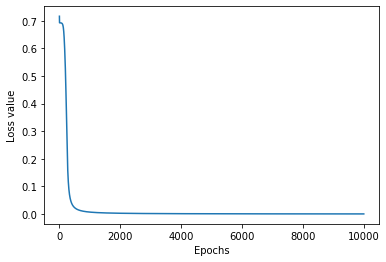

In [6]:
iterations = 10000
for i in range(iterations):
    z1,a1,z2,a2 = forward_prop(w1,w2,b1,b2,x)
    loss = -(1/m)*np.sum(y*np.log(a2)+(1-y)*np.log(1-a2))
    losses.append(loss)
    da2,dw2,db2,dz1,dw1,db1 = back_prop(m,w1,w2,z1,a1,z2,a2,y)
    w2 = w2-lr*dw2
    b2 = b2 - lr * db2
    w1 = w1-lr*dw1
    b1 = b1 - lr * db1

# We plot losses to see how our network is doing
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss value")



#### Now after training we see how our neural network is doing in terms of predictions

In [7]:
def predict(w1,w2,b1,b2,input):
    z1,a1,z2,a2 = forward_prop(w1,w2,b1,b2,test)
    a2 = np.squeeze(a2)
#     if a2>=0.5:
#         print("For input", [i[0] for i in input], "output is 1")# ['{:.2f}'.format(i) for i in x])
#     else:
#         print("For input", [i[0] for i in input], "output is 0")
    return a2

#### Here are the predictions of our trained neural network

In [8]:
test = np.array([[1],[0]])
print(predict(w1,w2,b1,b2,test))
test = np.array([[0],[0]])
print(predict(w1,w2,b1,b2,test))
test = np.array([[0],[1]])
print(predict(w1,w2,b1,b2,test))
test = np.array([[1],[1]])
print(predict(w1,w2,b1,b2,test))

0.9995725479315279
0.0005944634920725347
0.9995725450529563
0.00045813017353088915


Text(0, 0.5, 'Loss value')

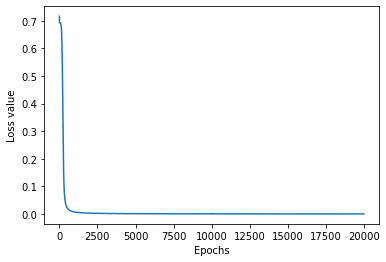

In [9]:
xy = z1
iterations = 10000
for i in range(iterations):
    z1,a1,z2,a2 = forward_prop(w1,w2,b1,b2,xy)
    loss = -(1/m)*np.sum(y*np.log(a2)+(1-y)*np.log(1-a2))
    losses.append(loss)
    da2,dw2,db2,dz1,dw1,db1 = back_prop(m,w1,w2,z1,a1,z2,a2,y)
    w2 = w2-lr*dw2
    b2 = b2 - lr * db2
    w1 = w1-lr*dw1
    b1 = b1 - lr * db1

# We plot losses to see how our network is doing
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss value")

In [10]:
test = np.array([[1],[0]])
print(predict(w1,w2,b1,b2,test))
test = np.array([[0],[0]])
print(predict(w1,w2,b1,b2,test))
test = np.array([[0],[1]])
print(predict(w1,w2,b1,b2,test))
test = np.array([[1],[1]])
print(predict(w1,w2,b1,b2,test))

0.999732145233163
0.000248393187218147
0.9997321266111439
0.7039411169683982
